# We are Team Unicorn

## Members

* Jackie Mcguire, Todd Fox, Jericho Herrera, Nicki Lang




![](http://www.levycreative.com/wp/wp-content/uploads/2015/01/10945748_10152844879967949_5392963414676228818_n.jpg)


## So what exactly is a Unicorn anyway and why should I care?

[Let's Find out!!](http://fortune.com/2015/01/22/the-age-of-unicorns/)

In [5]:
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *
import numpy
import pandas as pd
from yahoo_quote_download import yqd
import os
import datetime
from datetime import date as d
from datetime import timedelta
import quandl
import apikeys
from decimal import Decimal
import time as t
from dateutil.relativedelta import relativedelta

In [6]:
quandl.ApiConfig.api_key = apikeys.QUANDL_API

In [7]:
stocks = pd.read_csv('techiposince2001.csv')

In [8]:
stocks.dtypes

Ticker        object
Name          object
LastSale     float64
MarketCap    float64
ADR TSO       object
IPOyear       object
Sector        object
Industry      object
dtype: object

In [9]:
stocks = stocks.loc[stocks['ADR TSO'] == 'n/a']

In [10]:
stocks.MarketCap = stocks.MarketCap.apply(lambda x: round(x/10000))


In [11]:
stocks=stocks.loc[stocks["IPOyear"]!='n/a']
stocks=stocks.loc[stocks["IPOyear"].astype(int)>=2000]
stocks.head()
stocks = stocks.drop(['ADR TSO', 'LastSale', 'Sector'], axis=1)
stocks.head()

,Ticker,Name,MarketCap,IPOyear,Industry
0,ACMR,"ACM Research, Inc.",8916,2017,Industrial Machinery/Components
1,ALTR,Altair Engineering Inc.,139644,2017,Computer Software: Prepackaged Software
3,AYX,"Alteryx, Inc.",158743,2017,Computer Software: Prepackaged Software
4,APPN,Appian Corporation,125190,2017,Computer Software: Prepackaged Software
5,AQ,Aquantia Corp.,36264,2017,Semiconductors


In [14]:
test =  stocks.groupby(stocks.Industry,as_index=False).count()
test2 = pd.DataFrame(test)
test2 = test2.sort_values(by='Ticker', ascending=False)

In [92]:
labels = test2['Industry']
values = test2['Ticker']
color_dict = {'royalblue','sienna','red','gold','chartreuse','darkgreen','mediumspringgreen','darkcyan','deepskyblue','firebrick','navy','mediumpurple',
             'plum','m','silver'}
explode = (5,5,5,0,0,0,0,0,0,0,0,0,0,0,0)
explode2 = (0,0,5,5,5,0,0,0,0,0,0,0,0,0,0)

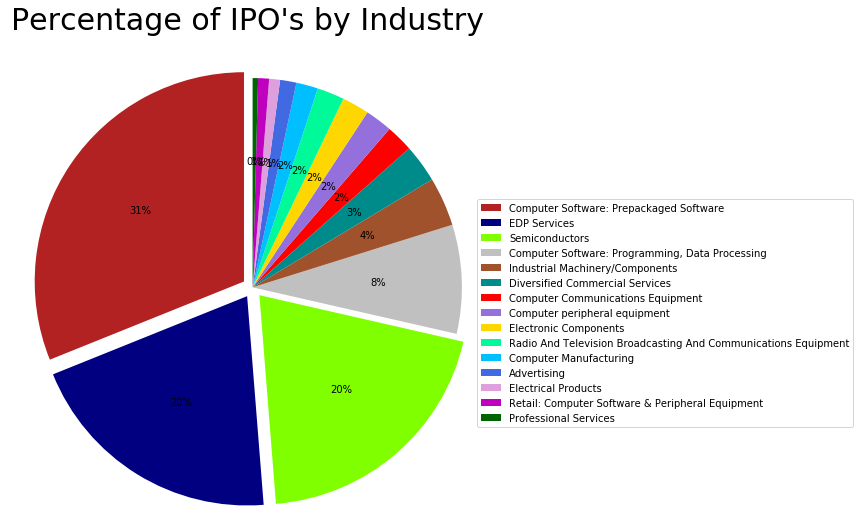

In [93]:
plt.pie(values,labels=None,radius=100.5,autopct='%.0f%%',startangle=90,colors=color_dict,explode=explode)
plt.legend(labels=labels,loc='center',bbox_to_anchor=(1.38,.45))
plt.axis('equal')
plt.title('Percentage of IPO\'s by Industry', loc='center', fontsize=30,va='top',y=1.1)
fig = plt.gcf()
fig.set_size_inches(8.5,8.5)
plt.show()

In [17]:
markcap = stocks.groupby(stocks.Industry).sum()
marketcapvalues = markcap['MarketCap']

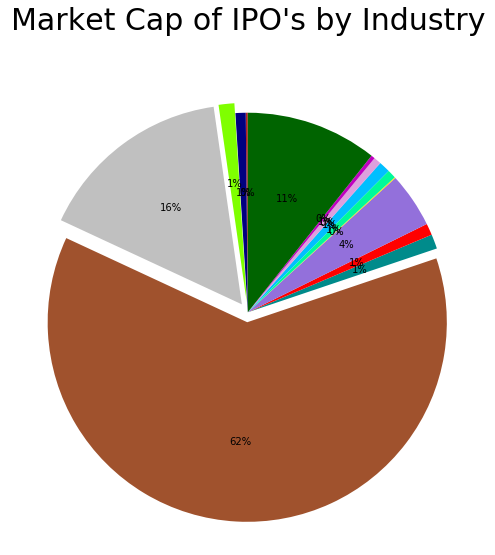

In [94]:
plt.pie(marketcapvalues, labels=None,radius=100.5,autopct='%.0f%%',startangle=90,colors=color_dict,explode=explode2)
plt.axis('equal')
plt.title('Market Cap of IPO\'s by Industry', loc='center', fontsize=30,va='top',y=1.15)
# plt.legend(labels=labels,loc='center',bbox_to_anchor=(1.38,.45))
fig = plt.gcf()
fig.set_size_inches(8.5,8.5)

plt.show()

In [26]:
def load_quote(ticker, startdate, enddate):
	print('===', ticker, '===')
	print(yqd.load_yahoo_quote(ticker, startdate, enddate))
	print(yqd.load_yahoo_quote(ticker, startdate, enddate, 'dividend'))
	print(yqd.load_yahoo_quote(ticker, startdate, enddate, 'split'))
def save_quote(ticker, startdate, enddate, filename):
    quotecsv = (yqd.load_yahoo_quote(ticker, startdate, enddate))
    with open(filename, 'a') as myfile:
        header=True
        for row in quotecsv:
            if header == True:
                myfile.write(row+','+'Ticker')
                myfile.write('\n')
                header=False
            else:
                myfile.write(row+','+ticker)
                myfile.write('\n')
            
def test():
	# Download quote for stocks
	load_quote(ticker, startdate, enddate)


In [27]:
# for row, year in zip(stocks["Ticker"],stocks["IPOyear"]):
#     try:
#         save_quote(row, str(year)+'0101', str(year)+'1231', 'firstyeardata.csv')
#     except:
#         None


In [28]:
firstyear_df = pd.read_csv('firstyeardata.csv')
firstyear_df["Date"] = pd.to_datetime(firstyear_df["Date"], errors='coerce')
def format_epoch(dt):
    return (dt - datetime.datetime(1970,1,1)).total_seconds()
def format_date(sec):
    try:
        return datetime.datetime.fromtimestamp(sec).strftime('%D')
    except:
        return None
now = datetime.datetime.now().date()
# oneyearout= now+timedelta(years=1)
firstyear_df["Date"] = firstyear_df["Date"].apply(format_epoch)



In [135]:
IPOdate_df=firstyear_df.loc[firstyear_df.groupby("Ticker")['Date'].idxmin()]
IPOdate_df["Date"] = IPOdate_df["Date"].apply(format_date)
IPOdate_df=IPOdate_df.dropna(how='all')
IPOdate_df = pd.merge(stocks, IPOdate_df, on='Ticker', how='outer')
IPOdate_df=IPOdate_df.drop(['High', 'Low', 'Volume', 'Open', 'Adj Close'], axis=1)
IPOdate_df["Date"] = pd.to_datetime(IPOdate_df["Date"], infer_datetime_format=True, format='%Y%m%d',)
IPOdate_df=IPOdate_df.rename(columns={"Date":"IPOdate",
                                     "Close": "IPOclose"})
IPOdate_df["IPOclose"]= pd.to_numeric(IPOdate_df["IPOclose"], errors='coerce')
IPOdate_df=IPOdate_df.drop(IPOdate_df[(IPOdate_df.Ticker == 'LN')].index)


In [136]:
IPOdate_df['date1yr']=IPOdate_df["IPOdate"].apply(lambda x: x+pd.DateOffset(years=1, days=-1)+BDay(1))
IPOdate_df['date3yr']=IPOdate_df["IPOdate"].apply(lambda x: x+pd.DateOffset(years=3, days=-1)+BDay(1))
IPOdate_df['date5yr']=IPOdate_df["IPOdate"].apply(lambda x: x+pd.DateOffset(years=5, days=-1)+BDay(1))
# IPOdate_df=IPOdate_df.loc[IPOdate_df["1yr"]<= (now+tdt(years=1))]
IPOdate_df



,Ticker,Name,MarketCap,IPOyear,Industry,IPOdate,IPOclose,date1yr,date3yr,date5yr
0,ACMR,"ACM Research, Inc.",8916,2017,Industrial Machinery/Components,2017-10-25,10.110000,2018-10-25,2020-10-26,2022-10-25
1,ALTR,Altair Engineering Inc.,139644,2017,Computer Software: Prepackaged Software,2017-10-25,13.230000,2018-10-25,2020-10-26,2022-10-25
2,AYX,"Alteryx, Inc.",158743,2017,Computer Software: Prepackaged Software,2017-03-23,15.500000,2018-03-23,2020-03-23,2022-03-23
3,APPN,Appian Corporation,125190,2017,Computer Software: Prepackaged Software,2017-05-24,15.010000,2018-05-24,2020-05-25,2022-05-24
4,AQ,Aquantia Corp.,36264,2017,Semiconductors,2017-01-02,0.220000,2018-01-02,2020-01-02,2022-01-03
5,BAND,Bandwidth Inc.,37939,2017,Computer Software: Prepackaged Software,2017-10-25,5.390000,2018-10-25,2020-10-26,2022-10-25
6,BKI,"Black Knight, Inc.",691382,2017,Computer Software: Prepackaged Software,2017-01-02,0.035000,2018-01-02,2020-01-02,2022-01-03
7,CARG,"CarGurus, Inc.",327396,2017,EDP Services,2017-10-11,27.580000,2018-10-11,2020-10-12,2022-10-11
8,CARS,Cars.com Inc.,191670,2017,EDP Services,2017-05-31,25.590000,2018-05-31,2020-06-01,2022-05-31
9,CISN,Cision Ltd.,143483,2017,Computer Software: Prepackaged Software,2017-06-29,10.290000,2018-06-29,2020-06-29,2022-06-29


In [137]:
def save_quote1yr (ticker, startdate, enddate, filename):
    quotecsv = (yqd.load_yahoo_quote(ticker, startdate, enddate))
    with open(filename, 'a') as myfile:
        header=True
        for row in quotecsv:
            if header == True:
                myfile.write(row+','+'Ticker,Period')
                myfile.write('\n')
                header=False
            else:
                myfile.write(row+','+ticker+',1yr')
                myfile.write('\n')
def save_quote3yr (ticker, startdate, enddate, filename):
    quotecsv = (yqd.load_yahoo_quote(ticker, startdate, enddate))
    with open(filename, 'a') as myfile:
        header=True
        for row in quotecsv:
            if header == True:
                myfile.write(row+','+'Ticker,Period')
                myfile.write('\n')
                header=False
            else:
                myfile.write(row+','+ticker+',3yr')
                myfile.write('\n')
def save_quote5yr (ticker, startdate, enddate, filename):
    quotecsv = (yqd.load_yahoo_quote(ticker, startdate, enddate))
    with open(filename, 'a') as myfile:
        header=True
        for row in quotecsv:
            if header == True:
                myfile.write(row+','+'Ticker,Period')
                myfile.write('\n')
                header=False
            else:
                myfile.write(row+','+ticker+',5yr')
                myfile.write('\n')

In [138]:
for idx, row in IPOdate_df.iterrows():
    try:
        save_quote1yr(row['Ticker'], row["date1yr"].strftime(format='%Y%m%d'), row['date1yr'].strftime(format='%Y%m%d'), 'performance.csv')
        save_quote3yr(row['Ticker'], row["date3yr"].strftime(format='%Y%m%d'), row['date3yr'].strftime(format='%Y%m%d'), 'performance.csv')
        save_quote5yr(row['Ticker'], row["date5yr"].strftime(format='%Y%m%d'), row['date5yr'].strftime(format='%Y%m%d'), 'performance.csv')

    except:
        None

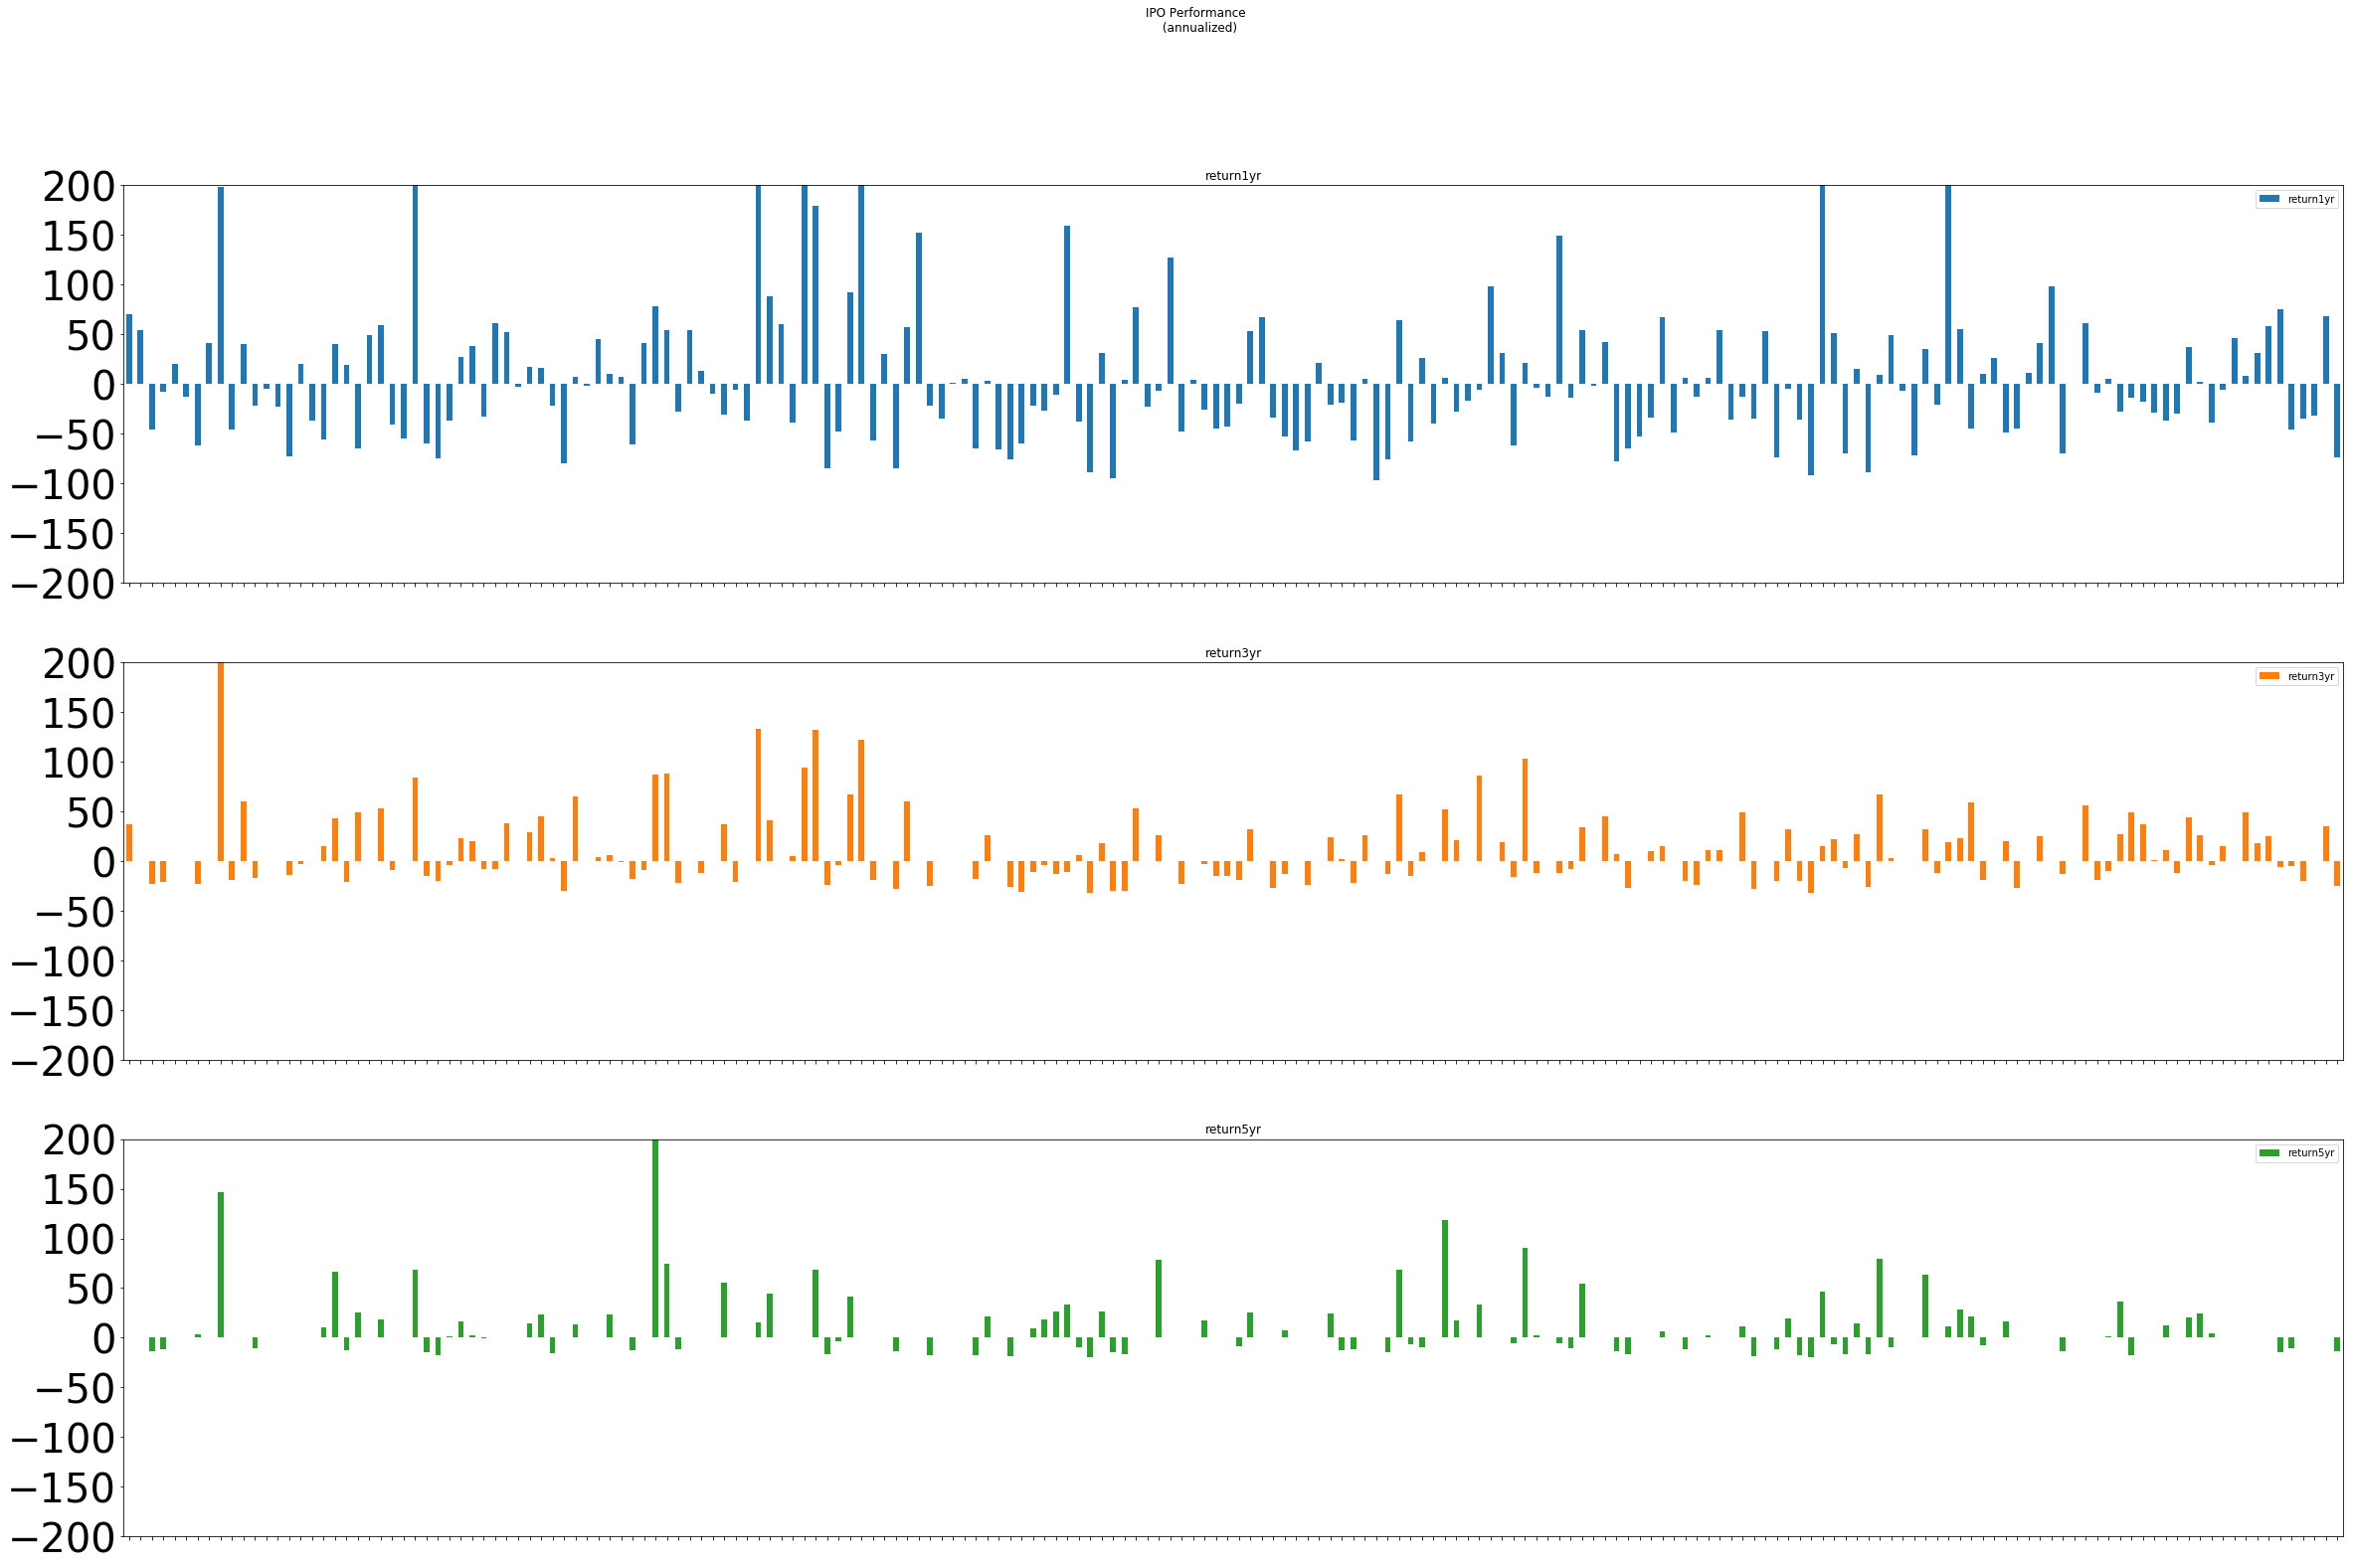

In [156]:
quotes_df = pd.read_csv('performance.csv', parse_dates=['Date'])
quotes_df["Close"]= pd.to_numeric(quotes_df["Close"], errors='coerce')
quotes_df = quotes_df.drop(['Open','High', 'Low', "Adj Close", "Volume"], axis=1)
quotes_df = quotes_df.dropna()
clean_quotes_df = quotes_df.loc[quotes_df["Date"]!='Date'].copy()
clean_quotes_df = clean_quotes_df.sort_values(by=['Ticker', 'Date'], ascending=True)
clean_quotes_df = clean_quotes_df.drop_duplicates()
clean_quotes_df["Date"] = pd.to_datetime(clean_quotes_df["Date"], infer_datetime_format=True, format='%Y%m%d',)
clean_quotes_df=clean_quotes_df.rename(columns={"Date":"IPOdate"
                                              })
# IPOdate_df
clean_pivot = clean_quotes_df.pivot(index='Ticker', columns='Period', values='Close')
clean_pivot
clean_pivot=clean_pivot.reset_index()
merged = pd.merge(clean_pivot, IPOdate_df, how='outer', on='Ticker')
# merged['return1yr'] = ""
# for idx, row in merged.iterrows():
merged["return1yr"] = (((merged['1yr'] - merged['IPOclose'])/merged['IPOclose'])*100)/1
merged["return3yr"] = (((merged['3yr'] - merged['IPOclose'])/merged['IPOclose'])*100)/3
merged["return5yr"] = (((merged['5yr'] - merged['IPOclose'])/merged['IPOclose'])*100)/5
merged=merged.dropna(subset=['1yr', '3yr', '5yr'], thresh=1)
merged
returndata = merged.filter(['Ticker', 'return1yr', 'return3yr', 'return5yr'])
returndata.plot(figsize = (40,25),fontsize = 40,kind='bar',legend=True, subplots=True,title='IPO Performance \n (annualized)', sharey=True, sharex=True)
plt.ylim(-200,200)
plt.xlabel("")
plt.tick_params(labelbottom='off')
plt.show()

In [186]:
IPOchart = pd.DataFrame(merged.groupby("IPOyear").return1yr.mean())
IPOchart=IPOchart.reset_index()
# IPOchart.plot(kind='line',x='IPOyear', y='return1yr')
# IPOchart = IPOchart.reset_index()
IPOchart

# NASchart=NASchart.reset_index()
# NASchart = NASchart.rename(index =str, columns={'Year': 'IPOyear'})
# NASchart = pd.merge(IPOchart, NASchart, on='IPOyear', how='right')
# NASchart

,IPOyear,return1yr
0,2000,-33.625440
1,2001,-35.659766
2,2002,1.756796
3,2003,-32.974945
4,2004,27.502839
5,2005,48.762277
6,2006,89.773213
7,2007,-16.196413
8,2008,-48.914377
9,2009,26.983805


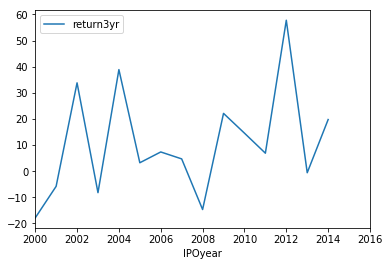

In [142]:
IPOchart = pd.DataFrame(merged.groupby("IPOyear").return3yr.mean())
IPOchart=IPOchart.reset_index()
IPOchart.plot(kind='line',x='IPOyear', y='return3yr')
plt.show()

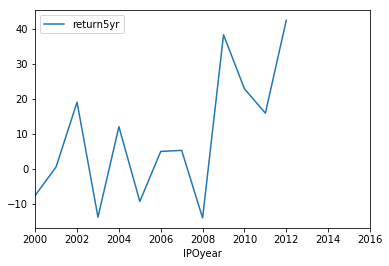

In [143]:
IPOchart = pd.DataFrame(merged.groupby("IPOyear").return5yr.mean())
IPOchart=IPOchart.reset_index()
IPOchart.plot(kind='line',x='IPOyear', y='return5yr')
plt.show()

In [146]:
returnbyyear = merged.filter(['Ticker', 'IPOyear' 'return1yr', 'return3yr', 'return5yr'])
returnbyyear = returnbyyear.reset_index()
returnbyyear = pd.DataFrame(returnbyyear.groupby("IPOyear"))
returnbyyear.plot(figsize = (10,10),kind='line',legend=True, subplots=True,title='IPO Performance by Year \n (annualized)', sharey=True, sharex=True)


KeyError: 'IPOyear'

In [ ]:
returnbyyear = merged.filter(['Ticker', 'IPOyear' 'return1yr', 'return3yr', 'return5yr'])
returnbyyear.plot(figsize = (10,10),kind='line',legend=True, subplots=True,title='IPO Performance by Year \n (annualized)', sharey=True, sharex=True)


In [ ]:
returndata.plot(figsize = (10,10),kind='bar',legend=True, subplots=True,title='IPO Performance \n (annualized)', sharey=True, sharex=True)
plt.ylim(-200,200)
plt.xlabel("")
plt.show()

In [184]:
NASchart = pd.read_csv('NASDAQ.csv')
NASchart
IPOdate_df

,Ticker,Name,MarketCap,IPOyear,Industry,IPOdate,IPOclose,date1yr,date3yr,date5yr
0,ACMR,"ACM Research, Inc.",8916,2017,Industrial Machinery/Components,2017-10-25,10.110000,2018-10-25,2020-10-26,2022-10-25
1,ALTR,Altair Engineering Inc.,139644,2017,Computer Software: Prepackaged Software,2017-10-25,13.230000,2018-10-25,2020-10-26,2022-10-25
2,AYX,"Alteryx, Inc.",158743,2017,Computer Software: Prepackaged Software,2017-03-23,15.500000,2018-03-23,2020-03-23,2022-03-23
3,APPN,Appian Corporation,125190,2017,Computer Software: Prepackaged Software,2017-05-24,15.010000,2018-05-24,2020-05-25,2022-05-24
4,AQ,Aquantia Corp.,36264,2017,Semiconductors,2017-01-02,0.220000,2018-01-02,2020-01-02,2022-01-03
5,BAND,Bandwidth Inc.,37939,2017,Computer Software: Prepackaged Software,2017-10-25,5.390000,2018-10-25,2020-10-26,2022-10-25
6,BKI,"Black Knight, Inc.",691382,2017,Computer Software: Prepackaged Software,2017-01-02,0.035000,2018-01-02,2020-01-02,2022-01-03
7,CARG,"CarGurus, Inc.",327396,2017,EDP Services,2017-10-11,27.580000,2018-10-11,2020-10-12,2022-10-11
8,CARS,Cars.com Inc.,191670,2017,EDP Services,2017-05-31,25.590000,2018-05-31,2020-06-01,2022-05-31
9,CISN,Cision Ltd.,143483,2017,Computer Software: Prepackaged Software,2017-06-29,10.290000,2018-06-29,2020-06-29,2022-06-29
